In [0]:
import numpy
seed = 42
numpy.random.seed(seed)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
from keras.preprocessing.image import ImageDataGenerator


''' 
    This function data_generator(path, shuffle)
    
    - Create an instance of ImageDataGenerator with different parametrer
    - Create from directory of data a data generator
    
    - Return a generator of data
'''


def data_generator(path, shuffle=True):
    generator = ImageDataGenerator(rescale=1. / 255)
    data = generator.flow_from_directory(path,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical',
                                         shuffle=shuffle)
    return data



Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt
import datetime


'''
    This function vgg16(weight_path=None)
    
    - Create structure as VGG16
    - Import weight of VGG16 trained on "ImageNet"
    
    - return the model vgg16 with weights
    
'''


def vgg16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(224, 224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


''' 
    This function vgg16_edit(path):
    
    - Create a model with structure of vgg16 through vgg16()
    - Freeze layer of this model
    - Remove a defined number of layer
    - Add new layers
 
    - return the model based on vgg16 but modified

    
'''


def vgg16_edit(path):
    model = vgg16(path)

    # Freezing Vgg16 layers
    for layer in model.layers[:37]:
        layer.trainable = False

    # number of element to delete
    number_delete_layer = 5

    for i in range(number_delete_layer):
        model.pop()

    # Add new layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))

    return model


'''
    This function training(model, loss, optimizer, train, dev, epoch)
    
    - compile the model
    - set a start timer
    - fit the model
    - set a stop timer
    - print time of execution
    - plot result
   
'''


def training(model, loss, optimizer, train, dev, epoch):

    # Compile model
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Start timer
    time_start = datetime.datetime.now()

    # Fit model
    result = model.fit_generator(train,
                                 steps_per_epoch=5,
                                 epochs=epoch,
                                 validation_data=dev,
                                 validation_steps=5)

    # Stop timer
    time_stop = datetime.datetime.now()

    # Print time
    print("Execution time: ", (time_stop - time_start).total_seconds())

    # Show Plot
    show_history(result, 'acc', 'val_acc', 'accuracy', 'epoch', 'train', 'validation', acc=1)
    show_history(result, 'loss', 'val_loss', 'loss', 'epoch', 'train', 'validation')
    
    return model


'''
    This function show_history(result, measure1, measure2, metrics, unit, set1, set2)
    
    - plot measure1 = e.g. acc
    - plot measure2 = e.g. val_acc
    - metrics e.g. accuracy
    - unit e.g. epoch
    - set1 e.g. training set
    - set2 e.g. validation set

'''


def show_history(result, measure1='', measure2='', metrics='', unit='', set1='', set2='', acc=None):
    plt.plot(result.history[measure1])
    plt.plot(result.history[measure2])
    axes = plt.gca()
    axes.set_xlim([0, epochs])
    axes.set_ylim([0, acc])

    
    plt.ylabel(metrics)
    plt.xlabel(unit)
    plt.legend([set1, set2], loc='upper left')
    plt.show()


''' 
    This function testing(model, test):
    
    - evaluate model
    - print result

'''

def testing(model, test, batch):

    score = model.evaluate_generator(test, ((100 // batch) + 1))

    print(score[0], 'loss')
    print(score[1], 'accuracy')
    
    return




In [0]:
''' Directory '''
path_train = '/content/gdrive/My Drive/Colab Notebooks/dataset/training_set/'
path_dev = '/content/gdrive/My Drive/Colab Notebooks/dataset/dev_set/'
path_test = '/content/gdrive/My Drive/Colab Notebooks/dataset/test_set/'
path_weights = '/content/gdrive/My Drive/Colab Notebooks/vgg16_weights_tf_dim_ordering_tf_kernels.h5'


In [0]:
from keras.optimizers import Adam

''' Hyper-parameter '''
batch_size = 64
epochs = 30
loss = 'categorical_crossentropy'
lr = 0.0005
decay = lr/epochs


adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay)
optimizer = adam


In [7]:
''' Create Generator for train, dev, test '''
train_generator = data_generator(path_train, shuffle=True)

dev_generator = data_generator(path_dev, shuffle=True)

test_generator = data_generator(path_test, shuffle=False)


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [8]:
''' Print statistics about data'''
class_dictionary = train_generator.class_indices
print("Class-Index:", class_dictionary)

Class-Index: {'bear': 0, 'bird': 1, 'cat': 2, 'dog': 3}


In [0]:
''' Create model based on vgg16 edited'''
model = vgg16_edit(path_weights)



Epoch 1/30
5/5 [==============================] - 36s 7s/step - loss: 1.5366 - acc: 0.3937 - val_loss: 1.0135 - val_acc: 0.5278
Epoch 2/30
5/5 [==============================] - 31s 6s/step - loss: 1.2632 - acc: 0.4312 - val_loss: 0.9131 - val_acc: 0.6562
Epoch 3/30
5/5 [==============================] - 3s 588ms/step - loss: 0.8122 - acc: 0.6250 - val_loss: 0.8763 - val_acc: 0.7031
Epoch 4/30
5/5 [==============================] - 3s 614ms/step - loss: 0.6833 - acc: 0.7687 - val_loss: 0.7401 - val_acc: 0.7639
Epoch 5/30
5/5 [==============================] - 3s 587ms/step - loss: 0.5460 - acc: 0.8000 - val_loss: 0.5823 - val_acc: 0.8125
Epoch 6/30
5/5 [==============================] - 3s 592ms/step - loss: 0.5022 - acc: 0.8250 - val_loss: 0.6048 - val_acc: 0.7891
Epoch 7/30
5/5 [==============================] - 3s 619ms/step - loss: 0.4355 - acc: 0.8250 - val_loss: 0.6509 - val_acc: 0.7431
Epoch 8/30
5/5 [==============================] - 3s 587ms/step - loss: 0.4245 - acc: 0.8250 -

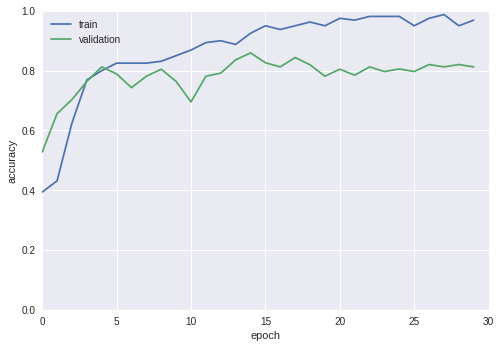

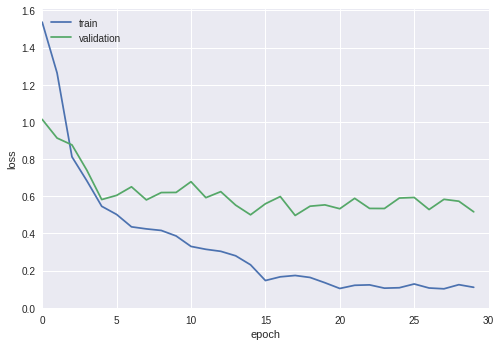

In [10]:
''' Training model'''
training(model, loss, optimizer, train_generator, dev_generator, epochs)

In [11]:
''' Testing model'''
testing(model, test_generator, batch_size)

0.3970964699983597 loss
0.828125 accuracy
